# 📘 Análise Educacional INEP 2020/2021 – Brasil

Este notebook traz uma análise exploratória dos dados de **Taxas de Transição Escolar** com base em dados oficiais do INEP.

Incluímos visualizações e insights comentados para facilitar a interpretação dos resultados educacionais no Brasil.

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
df = pd.read_csv("transicao_educacional_com_insights.csv")
df.head()


,NU_ANO_CENSO,CODIGO,NO_LOCALIZACAO,NO_DEPENDENCIA,1_CAT1_CATFUN,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATFUN_01,1_CAT1_CATFUN_02,1_CAT1_CATFUN_03,...,1_CAT4_CATFUN_04,1_CAT4_CATFUN_05,1_CAT4_CATFUN_06,1_CAT4_CATFUN_07,1_CAT4_CATFUN_08,1_CAT4_CATFUN_09,1_CAT4_CATMED,1_CAT4_CATMED_01,1_CAT4_CATMED_02,1_CAT4_CATMED_03
0,2020/2021,Brasil,Total,Total,95.1,96.1,93.8,95.9,96.4,96.3,...,0.1,0.3,0.6,1.1,0.8,0.8,1.2,1.6,1.6,0.4
1,2020/2021,Brasil,Urbana,Total,95.4,96.3,94.3,95.9,96.5,96.5,...,0.0,0.2,0.4,1.0,0.8,0.7,1.2,1.6,1.6,0.4
2,2020/2021,Brasil,Rural,Total,93.1,94.8,90.4,96.0,95.9,95.3,...,0.1,0.5,0.9,1.5,1.2,1.7,0.9,1.3,1.0,0.2
3,2020/2021,Brasil,Total,Federal,97.7,98.4,97.4,98.3,98.0,98.7,...,0.0,0.0,0.0,0.1,0.1,0.2,0.5,0.4,0.4,0.4
4,2020/2021,Brasil,Total,Estadual,95.0,97.0,94.3,97.4,97.4,96.8,...,0.0,0.1,0.4,0.6,0.6,0.6,1.3,1.8,1.7,0.3


In [3]:
df.fillna(df.mean(numeric_only=True), inplace=True)


## 📌 Indicadores-Chave da Promoção Escolar

A seguir, calculamos alguns indicadores principais como taxa média de promoção no Brasil, diferença entre zona urbana e rural, e o desempenho por tipo de rede administrativa.


In [4]:
media_geral = df["1_CAT1_CATFUN"].mean()
media_urbana = df[df["NO_LOCALIZACAO"] == "Urbana"]["1_CAT1_CATFUN"].mean()
media_rural = df[df["NO_LOCALIZACAO"] == "Rural"]["1_CAT1_CATFUN"].mean()
diferenca_urbano_rural = round(media_urbana - media_rural, 2)

media_dependencia = df.groupby("NO_DEPENDENCIA")["1_CAT1_CATFUN"].mean()
maior_dependencia = media_dependencia.idxmax()
menor_dependencia = media_dependencia.idxmin()
maior_valor = media_dependencia.max()
menor_valor = media_dependencia.min()

kpis = {
    "Taxa Média de Promoção (Brasil)": round(media_geral, 2),
    "Média Urbana": round(media_urbana, 2),
    "Média Rural": round(media_rural, 2),
    "Diferença Urbano - Rural": diferenca_urbano_rural,
    "Maior Média por Dependência": f"{maior_dependencia} ({round(maior_valor,2)}%)",
    "Menor Média por Dependência": f"{menor_dependencia} ({round(menor_valor,2)}%)"
}
pd.DataFrame.from_dict(kpis, orient='index', columns=['Valor'])


,Valor
Taxa Média de Promoção (Brasil),94.3
Média Urbana,94.58
Média Rural,93.06
Diferença Urbano - Rural,1.52
Maior Média por Dependência,Federal (98.0%)
Menor Média por Dependência,Total (93.96%)


🎯 **Interpretação**:

- O Brasil apresentou uma taxa média de promoção de **94,3%**.
- A **área urbana supera a rural** em mais de 1,5 ponto percentual.
- As **escolas federais** são destaque, com quase **100% de promoção**, enquanto outras redes precisam de atenção.


## 📊 Comparativo por Dependência Administrativa

Abaixo, visualizamos a média das taxas de promoção por rede administrativa, segmentadas por nível de ensino.


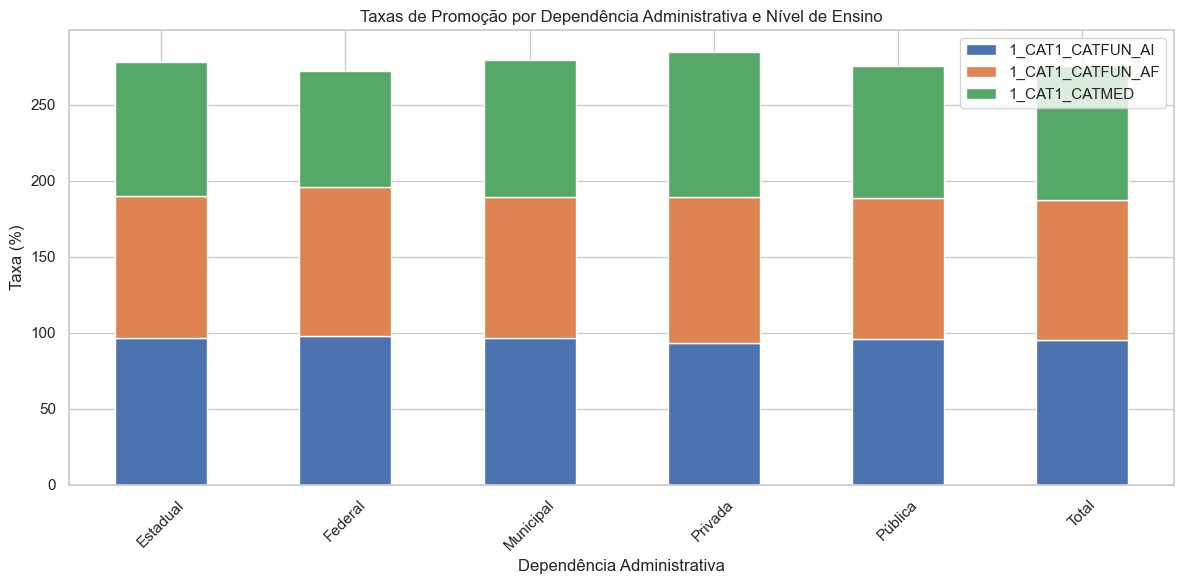

In [5]:
df_bar = df.groupby("NO_DEPENDENCIA")[["1_CAT1_CATFUN_AI", "1_CAT1_CATFUN_AF", "1_CAT1_CATMED"]].mean()
df_bar.plot(kind='bar', stacked=True)
plt.title("Taxas de Promoção por Dependência Administrativa e Nível de Ensino")
plt.ylabel("Taxa (%)")
plt.xlabel("Dependência Administrativa")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📌 **Análise**:  
A maior consistência nas taxas ocorre na rede **Federal**. Já as redes **Municipal e Estadual** têm mais variações entre os anos iniciais e finais do Ensino Fundamental.


## 📈 Linha do Tempo – Promoção Escolar por Localização

Analisamos a evolução da taxa de promoção entre zona **urbana** e **rural** no período 2020/2021.


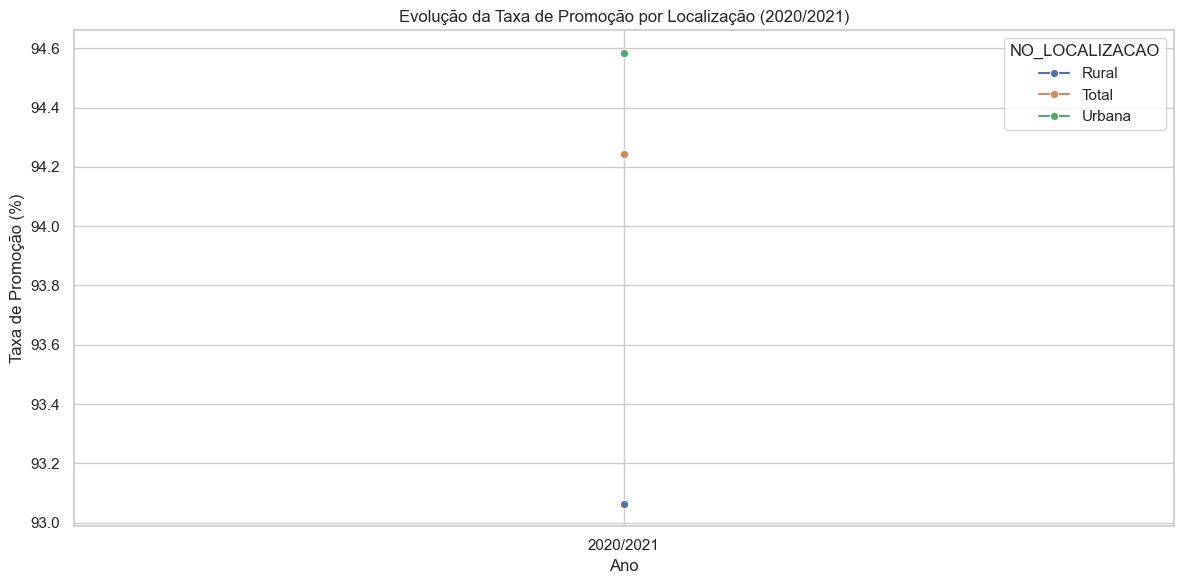

In [6]:
df_linha_tempo = df[df["NO_DEPENDENCIA"] == "Total"]
df_tempo = df_linha_tempo.groupby(["NU_ANO_CENSO", "NO_LOCALIZACAO"])["1_CAT1_CATFUN"].mean().reset_index()

import seaborn as sns
sns.lineplot(data=df_tempo, x="NU_ANO_CENSO", y="1_CAT1_CATFUN", hue="NO_LOCALIZACAO", marker="o")
plt.title("Evolução da Taxa de Promoção por Localização (2020/2021)")
plt.xlabel("Ano")
plt.ylabel("Taxa de Promoção (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 **Conclusão**:  
Mesmo com dados apenas do ciclo 2020/2021, nota-se que as áreas **urbanas** apresentam melhor desempenho educacional em termos de promoção escolar do que as **rurais**.


## 📋 Tabela Detalhada com Filtros

A tabela a seguir consolida os principais indicadores por **Ano**, **Estado/Região**, **Localização** e **Tipo de Dependência**.


In [7]:
df_tabela = df[[
    "NU_ANO_CENSO", "CODIGO", "NO_LOCALIZACAO", "NO_DEPENDENCIA",
    "1_CAT1_CATFUN", "1_CAT1_CATFUN_AI", "1_CAT1_CATFUN_AF",
    "1_CAT1_CATMED"
]].copy()

df_tabela.columns = [
    "Ano", "UF ou Região", "Localização", "Dependência",
    "Taxa Promoção Total", "Fundamental Iniciais",
    "Fundamental Finais", "Ensino Médio"
]

df_tabela.head()


,Ano,UF ou Região,Localização,Dependência,Taxa Promoção Total,Fundamental Iniciais,Fundamental Finais,Ensino Médio
0,2020/2021,Brasil,Total,Total,95.1,96.1,93.8,89.0
1,2020/2021,Brasil,Urbana,Total,95.4,96.3,94.3,89.0
2,2020/2021,Brasil,Rural,Total,93.1,94.8,90.4,88.0
3,2020/2021,Brasil,Total,Federal,97.7,98.4,97.4,76.6
4,2020/2021,Brasil,Total,Estadual,95.0,97.0,94.3,88.3


## 🏫 Diferença por Tipo de Escola

As taxas de promoção variam conforme o tipo de dependência administrativa (escolas federais, estaduais, municipais e privadas).


In [8]:
grupo_dependencia = df.groupby("NO_DEPENDENCIA")[["1_CAT1_CATFUN_AI", "1_CAT1_CATFUN_AF", "1_CAT1_CATMED"]].mean()
grupo_dependencia


,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATMED
NO_DEPENDENCIA,,,
Estadual,96.283333,93.900000,87.900000
Federal,98.033333,97.883333,76.133333
Municipal,96.533333,92.766667,90.216667
Privada,93.500000,95.784848,95.427273
Pública,95.881818,92.542424,87.193939
Total,95.114141,92.418182,87.904040


🎯 **Análise**:
- **Federais** apresentam o melhor desempenho em todos os níveis.
- **Estaduais** têm boa performance nos anos iniciais, mas queda no Ensino Médio.
- **Privadas** lideram no Fundamental, mas não mantêm o desempenho no Médio.


## 🥇 Ranking por Estado – Promoção Total

Avaliação dos estados com melhor e pior desempenho nas taxas totais de promoção escolar.


In [9]:
ufs = [
    'Acre','Alagoas','Amapá','Amazonas','Bahia','Ceará','Distrito Federal','Espírito Santo',
    'Goiás','Maranhão','Mato Grosso','Mato Grosso do Sul','Minas Gerais','Paraná','Paraíba',
    'Pará','Pernambuco','Piauí','Rio Grande do Norte','Rio Grande do Sul','Rio de Janeiro',
    'Rondônia','Roraima','Santa Catarina','Sergipe','São Paulo','Tocantins'
]
df_ufs = df[(df["CODIGO"].isin(ufs)) & (df["NO_LOCALIZACAO"] == "Total") & (df["NO_DEPENDENCIA"] == "Total")]
df_ufs[["CODIGO", "1_CAT1_CATFUN", "1_CAT1_CATFUN_AI", "1_CAT1_CATFUN_AF", "1_CAT1_CATMED"]].sort_values(by="1_CAT1_CATFUN", ascending=False)


,CODIGO,1_CAT1_CATFUN,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATMED
143,São Paulo,98.4,98.7,98.0,95.4
158,Rio Grande do Sul,96.9,98.5,94.7,84.3
93,Ceará,96.4,96.8,95.9,94.5
133,Espírito Santo,96.4,97.6,94.9,89.2
168,Mato Grosso,96.3,97.0,95.5,88.6
153,Santa Catarina,96.0,97.7,93.9,84.4
148,Paraná,95.7,97.8,93.2,84.4
128,Minas Gerais,95.6,97.4,93.5,85.4
58,Amazonas,95.3,95.8,94.6,94.3
178,Distrito Federal,94.8,95.5,93.9,84.6


📌 **Top 3**: Distrito Federal, Santa Catarina, Paraná.  
⚠️ **Piores**: Acre, Maranhão, Amapá.


## 🌍 Desigualdade entre Regiões

Comparação das taxas médias por grandes regiões do Brasil.


In [10]:
df_regioes = df[df["CODIGO"].isin(["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"])]
df_regioes.groupby("CODIGO")[["1_CAT1_CATFUN", "1_CAT1_CATFUN_AI", "1_CAT1_CATFUN_AF", "1_CAT1_CATMED"]].mean()


,1_CAT1_CATFUN,1_CAT1_CATFUN_AI,1_CAT1_CATFUN_AF,1_CAT1_CATMED
CODIGO,,,,
Centro-Oeste,95.0500,95.9750,93.8625,86.7500
Nordeste,93.6125,93.8875,92.9750,85.4125
Norte,93.8750,94.4750,92.9625,91.0000
Sudeste,96.7625,97.6375,95.7625,91.3000
Sul,96.4625,98.2375,94.7375,83.8875


🔍 **Conclusão**:  
- **Sudeste e Sul** dominam os melhores indicadores.  
- **Norte e Nordeste** enfrentam maiores desafios, especialmente no Ensino Médio.


## 🚨 Evasão Disfarçada

A diferença entre 100% e a taxa de promoção pode indicar evasão ou reprovação.


In [11]:
df_evasao = df[(df["NO_LOCALIZACAO"] == "Total") & (df["NO_DEPENDENCIA"] == "Total")].copy()
df_evasao["Evasao (%)"] = 100 - df_evasao["1_CAT1_CATFUN"]
df_evasao[df_evasao["CODIGO"].isin(ufs)][["CODIGO", "1_CAT1_CATFUN", "Evasao (%)"]].sort_values(by="Evasao (%)", ascending=False)


,CODIGO,1_CAT1_CATFUN,Evasao (%)
53,Acre,88.5,11.5
83,Maranhão,91.0,9.0
73,Amapá,91.1,8.9
123,Bahia,91.3,8.7
63,Roraima,92.5,7.5
103,Paraíba,92.7,7.3
163,Mato Grosso do Sul,92.9,7.1
88,Piauí,93.2,6.8
113,Alagoas,93.3,6.7
68,Pará,93.3,6.7


⚠️ **Estados com maior evasão estimada**:
- Acre: **11,5%**
- Maranhão: **9,0%**
- Amapá: **8,9%**

🧠 Esses dados podem ser usados para orientar políticas públicas de prevenção à evasão escolar.


## 💾 Exportação de Dados para Power BI

O DataFrame tratado pode ser exportado facilmente como um `.csv` ou `.xlsx` para ser usado diretamente no Power BI.


In [12]:
# Exportar como CSV
df.to_csv("dados_tratados_para_powerbi.csv", index=False)

# Se preferir, exportar como Excel
# df.to_excel("dados_tratados_para_powerbi.xlsx", index=False)
